## 영화 리뷰 : 이진 분류 예제

리뷰 텍스트를 기반으로 영화 리뷰를 긍정과 부정으로 분류하는 예제

IMDB(Internet Movie Database) 데이터 셋
- 인터넷 영화 데이터베이스(IMDB)로부터 가져온
- 양극단의 리뷰 50,000개로 이루어진 데이터 셋 사용

- 훈련 데이터25,000개와 테스트 데이터 25,000개로 나뉘어 있고
- 각각 50%는 부정, 50%는 긍정 리규로 구성되어 있음

- 케라스 데이터 셋에 포함되어 있고
- 전처리 되어 있음 : 각 리뷰(단어 시퀀스)가 숫자 시퀀스로 변환되어 있음
- 각 숫자는 사전에 있는 고유한 단어를 나타냄

어휘 사전(사전)
- 모든 단어에 고유한 번호 부여
- 텍스트 데이터를 다룰 때 기본적으로 수행하는 전처리 과정

In [8]:
# 데이터 셋 로드
# 처음 실행하면 17MB 정도의 데이터가 다운로드 됨

from keras.datasets import imdb
import warnings
warnings.filterwarnings('ignore')

(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)
# train_data, train_labels, test_data, test_labels = imdb.load_data(num_words=10000) # 괄호 없으면 오류

# num_words=10000
# 훈련 데이터에서 가장 자주 나타나는 단어 10,000개만 사용하겠다는 의미
# 드물게 나타나는 단어는 무시
# 이렇게 하면 적절한 크기의 벡터 데이터를 얻을 수 있음

In [ ]:
train_data / test_data : 리뷰 목록
- 각 리뷰는 단어 인덱스의 리스트
- 단어 시퀀스가 인코딩된 것

train_labels / test_labels (레이블 값)
- 0 : 부정
- 1 : 긍정

In [9]:
train_data.shape

(25000,)

In [10]:
test_data.shape

(25000,)

In [4]:
train_labels

array([1, 0, 0, ..., 0, 1, 0])

In [5]:
test_labels

array([0, 1, 1, ..., 0, 0, 0])

In [11]:
# num_words=10000
# 가장 자주 등장하는 단어 10,000개로 제한했기 때문에
# 단어 인덱스는 10,000을 넘지 않음
max([max(sequence) for sequence in train_data])

9999

In [ ]:
데이터 준비
- 신경망에서 숫자 리스트를 주입할 수 없음
- 리스트를 텐서로 변환해야 함

(1) 같은 길이가 되도록 리스트에 패딩 추가하고 '(samples, sequence_length)' 크기의 정수 텐서로 변환

(2) 리스트를 원-핫 인코딩하여 0과 1의 벡터로 변환 : 이 방법 사용

In [16]:
# 원-핫 인코딩 사용해서 리스트를 변환

import numpy as np

def vectorize_sequence(sequences, dimension=10000):
    # 크기가 (len(sequences), dimension)이고 모둔 원소가 0인 행렬 생성
    # (25000, 10000)
    results = np.zeros((len(sequences), dimension)) # 모두 0으로 채움
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.    # results[i]에서 특정 인덱스의 위치를 1로 만듦
        
    return results

# 훈련 데이터를 벡터로 변환
x_train = vectorize_sequence(train_data)

# 테스트 데이터를 벡터로 변환
x_test = vectorize_sequence(test_data)

In [17]:
x_train

array([[0., 1., 1., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.],
       ...,
       [0., 1., 1., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.]])

In [18]:
x_test

array([[0., 1., 1., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.],
       ...,
       [0., 1., 1., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.]])

In [19]:
train_labels

array([1, 0, 0, ..., 0, 1, 0])

In [20]:
# 레이블을 float32 형으로 변한
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

In [ ]:
# 신경망에 사용할 데이터 준비 끝

In [ ]:
신경망 모델 만드는 작업 순서
(1) 모델 설정
(2) 모델 컴파일
(3) 모델 실행(학습)
(4) 모델 평가 (결과 출력)

(1) 모델 설정
- 입력 데이터가 벡터이고 레이블은 스칼라(1 또는 0) : 데이터 간단하게 생겼음
- 이런 문제에 잘 작동하는 네트워크 종류는 'relu' 활성화 함수를 사용한 완전 연결 층
- 별다른 문제 층을 쌓은 것
- Dense(16, actiation='relu')

- Dense 층에 전달한 매개변수(16)은 은닉 유닛의 개수
- 하나의 은닉 유닛은 층이 나타내는 표현 공간에서 하나의 차원이 됨

- 16개의 은닉 유닛이 있다는 것은
- 가중치 행렬의 크기가 16이라는 뜻
- 그리고 편향 벡터 'b'를 더하고 'relu' 연산을 적용합니다

- 은닉 유닛을 늘리면 (표현 공간 더 고차원으로 만들면)
- 신경망이 더 복잡한 표현을 학습할 수 있지만
- 계산 비용이 커지고 원치 않는 패턴을 학습할 수도 있음

- Dense 층을 쌓을 때 두 가지 중요한 구조상의 결정이 필요
- 얼마나 많은 층을 사용할 것인가
- 각 층에 얼마나 많은 은닉 유닛을 둘 것인가


In [59]:
# (1) 모델 설정

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import tensorflow as tf

tf.random.set_seed(3)

model = Sequential()
model.add(Dense(16, activation='relu', input_shape=(10000,)))
model.add(Dense(16, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# 중간의 은닉층은 활성화 함수로 'relu' 사용
# - 음수는 0으로 만듦

# 마지막 층은 확률을 출력하기 위해 시그모이드 활성화 함수 사용
# - 0과 1사이의 점수로
# - 어떤 샘플이 타식 1일 가능성이 높다는 것은
# - 글 리뷰가 긍정일 가능성이 높다는 것을 의미

In [ ]:
(2) 모델 컴파일

손실 함수와 옵티마이저 선택

손실 함수
- 이진 분류 문제이고 신경망의 출력이 확률이기 때문에
- (네트워크(모델) 끝에 시그모이드 활성화 함수를 사용한 하나의 유닛으로 된 층을 두었음)
- binary_crossentropy 손실 함수가 적합
- 이 함수가 유일한 선택은 아니고 mean_sqard_eroor를 사용할 수도 있음
- 확률을 출력하는 모델을 사용할 때는 크로스엔트로피가 최선의 선택
- 크로스엔트로피는 정보 이론 분야에서 온 개념으로 확률 분포 간의 차이를 측정
- 여기에서는 원본 분포와 예측 분포 사이를 측정

옵티마이저
- optimizer='rmsprop'
- 옵티마이저 매개변수 변경 시 : optimizer=optimizers.RMSprop(lr=0.001)
- 자신만의 손실 함수를 전달할 경우
- 옵티마이저 파이썬 클래스를 사용해 객체를 직접 만들어
- optimizer 매개변수에 전달하면됨

In [60]:
# (2) 모델 컴파일
# 손실 함수와 옵티마이저 선택해서 모델을 설정하는 단계
# 'rmsprop' 옵티마이저와
# binary_crossentropy 손실 함수 선택

from tensorflow.keras import optimizers

# model.compile(optimizer='rmsprop',
model.compile(optimizer=optimizers.RMSprop(lr=0.001),
             loss='binary_crossentropy',
             metrics=['accuracy'])

###  훈련 검증

In [ ]:
검증 데이터 셋 생성
- 훈련하는 동안 처음 본 데이터에 대한 모델의 정확도를 측정하기 위해
- 원본 훈련 데이터에서 10,000의 샘플을 떼어서 검증 데이터 셋으로 생성

In [30]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]

y_val = y_train[:10000]
partial_y_train = y_train[10000:]

(3) 모델 실행(학습)
- 모델을 512개 샘플씩 미니 배치를 만들어 20번 에포크 동안 훈련
- x_train과 y_train 텐서에 있는 모든 샘플에 대해 20번 반복
- 동시에 따로 분리해 높은 10,000개의 샘플에서 손실과 정확도 측정
- validation_data 매개변수에 검증 데이터 전달

In [61]:
# (3) 모델 실행(학습)
# Matplotlib을 사용해 훈련과 검증 데이터에 대한 손실과 정확도를 시각화하기 위해
# model.fit() 메서드 반환하는 History 객체 생성
# 이 객체에는 훈련하는 동안 발생한 모든 정보를 가지고 있음
# 딕셔너리 형태의 history 속성을 가지고 있음

history = model.fit(partial_x_train, 
                   partial_y_train,
                   epochs=20,
                   batch_size=512,
                   validation_data=(x_val, y_val))

# loss, accuracy, val_loss,  val_accuracy
# 훈련 손실, 훈련 정확도, 검증 손실, 검증 정확도

Epoch 1/20
30/30 [==============================] - 2s 45ms/step - loss: 0.5805 - accuracy: 0.7119 - val_loss: 0.3853 - val_accuracy: 0.8607
Epoch 2/20
30/30 [==============================] - 1s 28ms/step - loss: 0.3192 - accuracy: 0.9042 - val_loss: 0.3229 - val_accuracy: 0.8758
Epoch 3/20
30/30 [==============================] - 1s 29ms/step - loss: 0.2270 - accuracy: 0.9282 - val_loss: 0.3136 - val_accuracy: 0.8709
Epoch 4/20
30/30 [==============================] - 1s 25ms/step - loss: 0.1777 - accuracy: 0.9458 - val_loss: 0.2813 - val_accuracy: 0.8867
Epoch 5/20
30/30 [==============================] - 1s 26ms/step - loss: 0.1405 - accuracy: 0.9567 - val_loss: 0.2816 - val_accuracy: 0.8856
Epoch 6/20
30/30 [==============================] - 1s 29ms/step - loss: 0.1165 - accuracy: 0.9674 - val_loss: 0.2946 - val_accuracy: 0.8843
Epoch 7/20
30/30 [==============================] - 1s 23ms/step - loss: 0.0964 - accuracy: 0.9718 - val_loss: 0.3084 - val_accuracy: 0.8823
Epoch 8/20
30

In [33]:
# model.fit()이 반환한 history 속성 확인 (딕셔너리)
history_dict = history.history
history_dict.keys()

# 훈련과 검증하는 동안 모니터링할 측정 지표 포함
# loss, accuracy, val_loss,  val_accuracy
# 훈련 손실, 훈련 정확도, 검증 손실, 검증 정확도

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [ ]:
# Matplotlib을 사용해 훈련과 검증 데이터에 대한 손실과 정확도를 시각화

In [34]:
import matplotlib.pyplot as plt

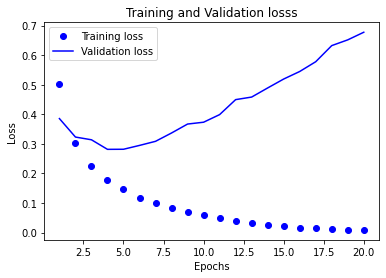

In [35]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

# 훈련 손실과 검증 손실 시각화
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')

plt.title('Training and Validation losss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

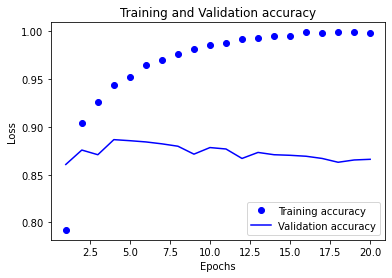

In [38]:
# 훈련 정확도와 검증 정확도 시각화

plt.clf()  # 그래프 초기화
plt.plot(epochs, acc, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')

plt.title('Training and Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

In [ ]:
결과

훈련 손실
- 에포크가 증가할수록 훈련 손실 감소
- 경사 하강법 최적화를 사용했기 때문에
- 반복마다 손실이 최소화되는 것으로 기대했던대로 결과 나왔음

검증 손실
- val_loss : 조금씩 감소하다가 6번째 에포크에서 역전되면서 검증 손실 증가
- 훈련 세트에서 잘 작동하는 모델이 처음 보는 데이터에서는 잘 작동하지 않음
--> 과적합 문제
- 2번째 에포크부터 훈련 데이터에 과도하게 최적화되어 
- 훈련 데이터에 특화된 표현을 학습함으로써 
- 훈련 데이터 셋 이외의 데이터에서는 일반화하지 못함
- 이런 경우에 과대적합을 방지하기 위해
- 3번째 에포크 이후에 훈련을 중지할 수 있음

In [46]:
#  처음부터 다시 새로운 신경망을 만들어서
# 4번의 에퐄 동안만 훈련하고\
# 데이트 데이터에서 평가

tf.random.set_seed(3)

model = Sequential()
model.add(Dense(16, activation='relu', input_shape=(10000,)))
model.add(Dense(16, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer=optimizers.RMSprop(lr=0.001),
             loss='binary_crossentropy',
             metrics=['accuracy'])

history = model.fit(partial_x_train, 
                   partial_y_train,
                   epochs=4,
                   batch_size=512,
                   validation_data=(x_val, y_val))

results = model.evaluate(x_test, y_test)

# 6번 에포크부터 과대적합 문제가 발생했다는 확인하에
# 4번, 5번 에포크 동안 훈련한 결과
# 4번 에포크 수행 시 검증 손실이 최적화로 많이 줄었음
#  val_loss: 0.6774   --> 0.2813 

Epoch 1/4
30/30 [==============================] - 2s 42ms/step - loss: 0.5805 - accuracy: 0.7119 - val_loss: 0.3853 - val_accuracy: 0.8607
Epoch 2/4
30/30 [==============================] - 1s 30ms/step - loss: 0.3192 - accuracy: 0.9042 - val_loss: 0.3229 - val_accuracy: 0.8758
Epoch 3/4
30/30 [==============================] - 1s 31ms/step - loss: 0.2270 - accuracy: 0.9282 - val_loss: 0.3136 - val_accuracy: 0.8709
Epoch 4/4
782/782 [==============================] - 5s 7ms/step - loss: 0.3012 - accuracy: 0.8780


In [ ]:
30/30 [==============================] - 1s 28ms/step - loss: 0.0057 - accuracy: 0.9996 - val_loss: 0.6774 - val_accuracy: 0.8661

In [47]:
results

[0.3012411594390869, 0.878000020980835]

In [ ]:
# 다시 시각화

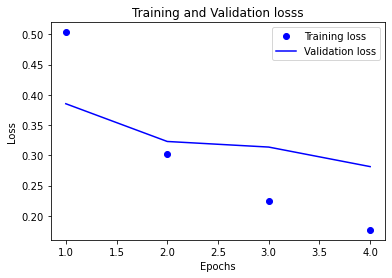

In [44]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

# 훈련 손실과 검증 손실 시각화
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')

plt.title('Training and Validation losss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

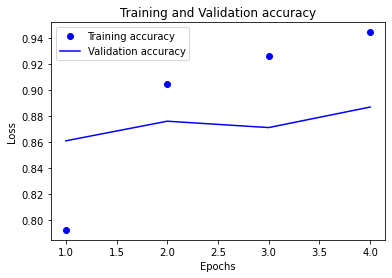

In [45]:
# 훈련 정확도와 검증 정확도 시각화

plt.clf()  # 그래프 초기화
plt.plot(epochs, acc, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')

plt.title('Training and Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

### 훈련된 모델로 새로운 데이터에 대해 예측하기

In [ ]:
모델을 훈련시킨 후에 이를 실전 환경에서 사용
pretict() 메서드 사용해서 어떤 리뷰가 긍정일 확률을 예측할 수 있음

In [48]:
model.predict(x_test)

array([[0.22011477],
       [0.9972087 ],
       [0.77906597],
       ...,
       [0.09702146],
       [0.11253944],
       [0.5112367 ]], dtype=float32)

In [51]:
model.predict(x_test)[:20]

array([[2.2011477e-01],
       [9.9720871e-01],
       [7.7906597e-01],
       [6.4490604e-01],
       [8.6110628e-01],
       [7.7820569e-01],
       [9.8798192e-01],
       [3.2819867e-02],
       [9.1765106e-01],
       [9.6375000e-01],
       [8.2712430e-01],
       [9.4412267e-03],
       [8.9263916e-04],
       [4.1003227e-03],
       [9.8286694e-01],
       [3.9780509e-05],
       [8.0505127e-01],
       [3.7094644e-01],
       [1.3230920e-02],
       [4.4600934e-02]], dtype=float32)

In [ ]:
우리가 생성한 모델은 어떤 샘플에 대해 확신을 가지고 있고(0.99 이상, 0.01 이하인 경우)
어떤 샘플에 대해서는 확신이 부족 (0.6, 0.4)

In [ ]:
정리
- 원본 데이터를 신경망에 텐서로 주입하기 위해서는
- 많은 전처리 작업 필요
- 단어 시퀀스는 이진 벡터로 인코딩
- relu 활성화 함수와 함께 Dense 층을 쌓은 네트워크(모델)는 감성 분류 등 여러 종류의 문제에 적용할 수 있어서 앞으로 자주 사용함
- 출력 클래스가 2개인 이진 분류 문제에는 하나의 유닛과 sigmoid 활서화 함수를 가진 Dense 층으로 끝나야 함
- 이 신경망의 출력은 확률을 나타내는 0과 1 사이의 스칼라 값
- 이진 분류 문제에서 이런 스칼라 시그모이드 출력에 대해 사용할 손실 함수는 binary_crossentropy 임
- rmspro 옵티마이저는 문제에 상관없이 일반적으로 좋은 선택으로 잘 사용됨
- 훈련 데이터에 대해 성능이 향상됨에 따라 신경망이 과대적합하기 시작하고
- 이전에 본적 없는 새로운 데이터에 대해서는 결과가 점점 더 나빠짐
- 항상 훈련 데이터 셋 이외의 데이터에서 성능을 모니터링해야 함

In [ ]:
합성곱 신경망
- 시각적 영상 분석에 주로 사용 
-이미지 행렬에 합성곱 연산을 수행해서 이미지의 특징을 추출